In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('dark_background')
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [31]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Satisfied employee tend to not leave,
When average number of hours is less employee tend to not leave,
When work accidents is high employee tend to not leave,
When there is a promotion employee tend not to leave,

<AxesSubplot:xlabel='salary'>

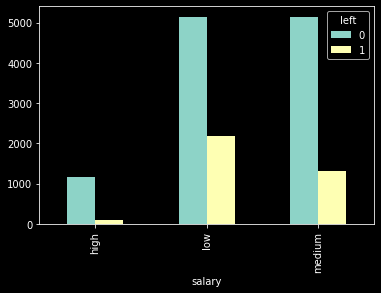

In [14]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

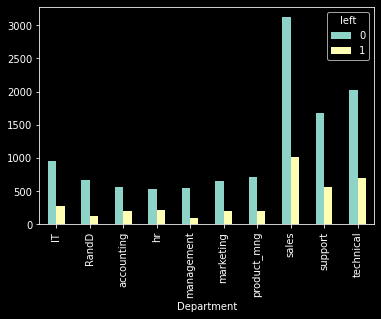

In [15]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [18]:
dummies = pd.get_dummies(df[['salary']])
dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [20]:
merged = pd.concat([df,dummies],axis='columns')
merged

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


In [23]:
final = merged.drop(['salary','Department','Work_accident','time_spend_company','number_project','last_evaluation','salary_medium'],axis='columns')
final

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary_high,salary_low
0,0.38,157,1,0,0,1
1,0.80,262,1,0,0,0
2,0.11,272,1,0,0,0
3,0.72,223,1,0,0,1
4,0.37,159,1,0,0,1
...,...,...,...,...,...,...
14994,0.40,151,1,0,0,1
14995,0.37,160,1,0,0,1
14996,0.37,143,1,0,0,1
14997,0.11,280,1,0,0,1


In [24]:
X = final.drop(['left'],axis='columns')
y = final.left

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
model.score(X_train,y_train)

0.7747312276023002